# Exploratory Analysis

## Problems:

Load the NYC AirBnB Truncated Dataset. This dataset is a mirror of the full NYC AirBnB dataset found at Kaggle, but only contains the first 10,000 entries. 

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

For the numerical features, 

1) Display histograms for the numerical features. 

2) Construct the scatter plots of price with each of the numerical features.

3) Display the correlation histogram.  

4) Which numerical feature appears to be most predictive of the price?

4) Using numerical features to predict the renting price with linear model. Write down the predict function.

6) Calculate the RSS cost.  

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/NYCAirBnB/train.csv")
data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Cozy apt in heart of the e village,40076332,Steven,Manhattan,East Village,40.72644,-73.98403,Entire home/apt,175,5,0,NaN,NaN,1,0
9995,Perfect Location - Meticulously Kept Flat,12620454,Will,Brooklyn,Bushwick,40.70442,-73.92484,Entire home/apt,220,5,27,1/1/2017,0.57,1,0
9996,Garden Apt in Historic Brownstone!,2060383,Lisa,Brooklyn,Cobble Hill,40.68732,-73.99245,Entire home/apt,147,3,23,6/16/2019,0.51,1,2
9997,East Village Private Room & Terrace,39956905,Can,Manhattan,East Village,40.72811,-73.98453,Private room,95,2,1,8/29/2015,0.02,2,0


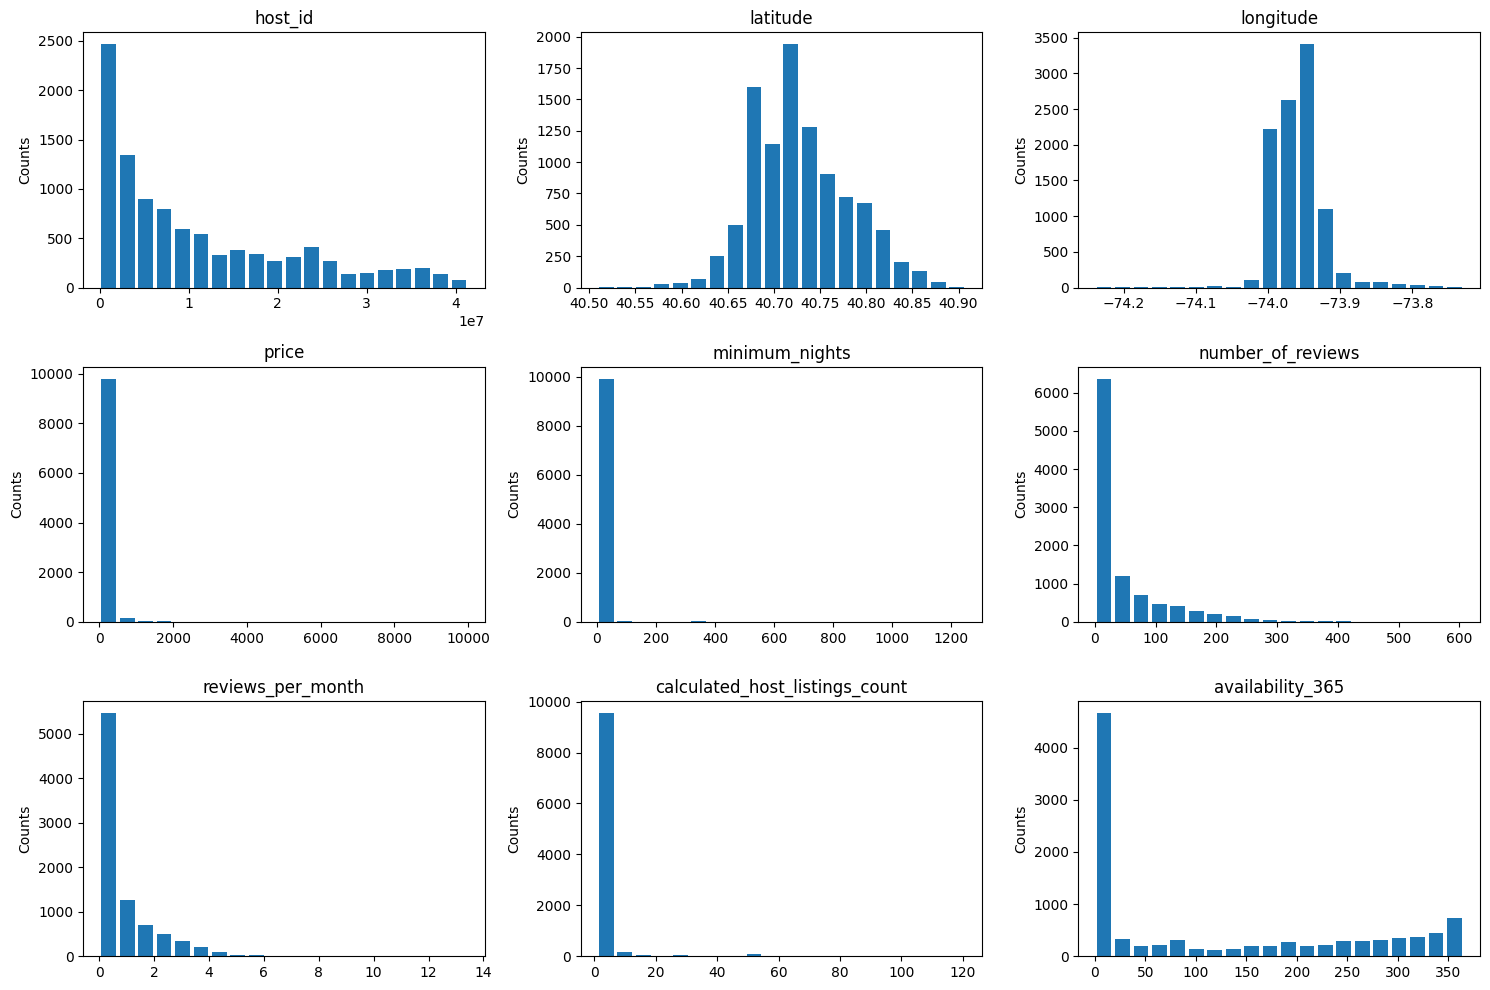

In [21]:
# (1) Display histograms for the numerical features.

# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for each numerical feature
plt.figure(figsize=(15, 10)) 
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)  # 3 rows, 3 columns of subplots
    plt.hist(data[col].dropna(), bins=20, rwidth=0.8)  # Drop NaN values
    plt.title(col)
    plt.ylabel('Counts')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



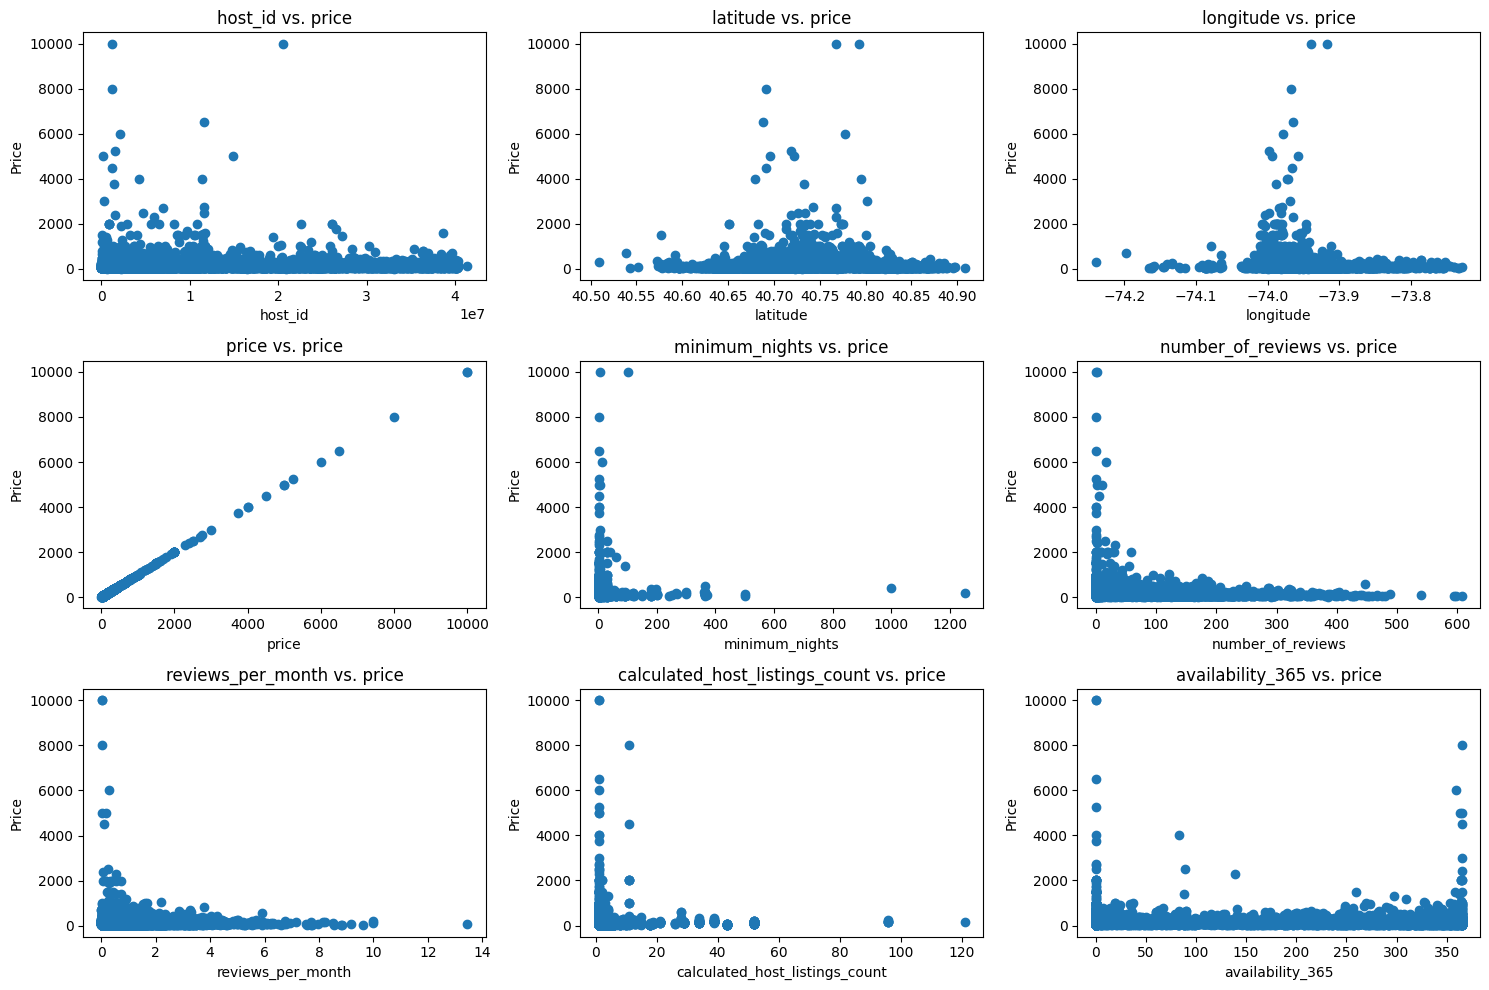

In [22]:
# (2) Construct the scatter plots of price with each of the numerical features.

# Create scatter plots for each numerical feature with price
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create a 3x3 grid of subplots
axes = axes.flatten()  # Flatten the 2D array to make it easier to iterate

for i, col in enumerate(numerical_features):
    axes[i].plot(data[col], data['price'], 'o')
    axes[i].set_title(col + ' vs. price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

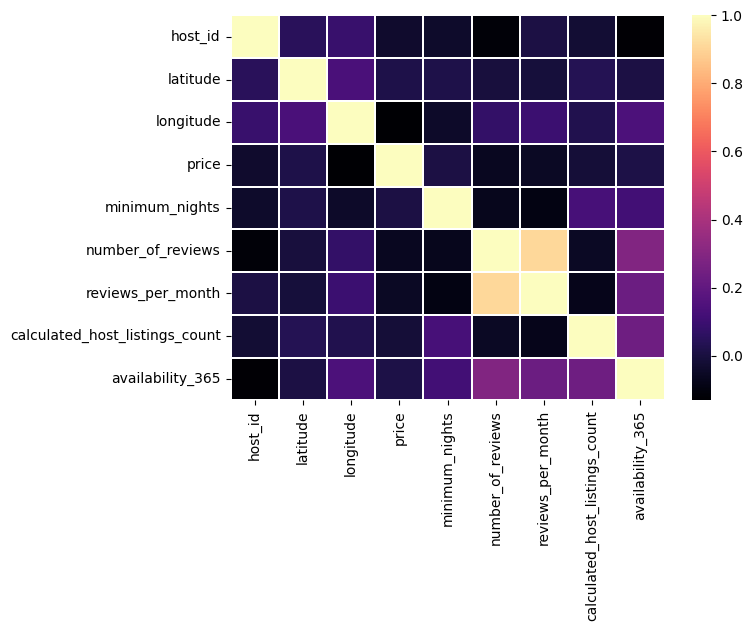

In [23]:
# (3) Display the correlation matrix and heatmap.

import seaborn as sns

# Define numsc as the DataFrame with numerical features
numsc = data.select_dtypes(include=['int64', 'float64'])

#Create the heatmap
fig,ax = plt.subplots(figsize=(7, 5))
sns.heatmap(numsc.corr(), ax=ax, linewidths=0.05,cmap="magma")
plt.show()

In [24]:
# (4) Which numerical feature appears to be most predictive of the price?
numsc.corr() 

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.047216,0.088338,-0.037943,-0.040252,-0.118066,0.009303,-0.023930,-0.123044
latitude,0.047216,1.000000,0.136623,0.018310,0.017739,-0.007246,-0.008119,0.036192,0.006747
longitude,0.088338,0.136623,1.000000,-0.131561,-0.045763,0.073975,0.097509,0.027376,0.142324
price,-0.037943,0.018310,-0.131561,1.000000,0.009302,-0.061049,-0.052015,-0.013230,0.010219
minimum_nights,-0.040252,0.017739,-0.045763,0.009302,1.000000,-0.071107,-0.092018,0.128604,0.115059
number_of_reviews,-0.118066,-0.007246,0.073975,-0.061049,-0.071107,1.000000,0.909053,-0.053937,0.289289
reviews_per_month,0.009303,-0.008119,0.097509,-0.052015,-0.092018,0.909053,1.000000,-0.074148,0.230191
calculated_host_listings_count,-0.023930,0.036192,0.027376,-0.013230,0.128604,-0.053937,-0.074148,1.000000,0.239173
availability_365,-0.123044,0.006747,0.142324,0.010219,0.115059,0.289289,0.230191,0.239173,1.000000


By the heatmap of (3), 'latitude' is the most predictive feature of the price.

In [25]:
# (5) Using all numerical features to predict the renting price with a linear model. Write down the predict function.

# Prepare the data
X = data[numerical_features]  # Features (keep as DataFrame)
y = data['price']  # Target variable

# Remove rows with NaN values
data_cleaned = data.dropna(subset=numerical_features)  # Remove rows with NaN in features or target

X_cleaned = data_cleaned[numerical_features].values  # Convert cleaned features to numpy array
y_cleaned = data_cleaned['price'].values  # Convert cleaned target to numpy array

# Add a column of '1's to X matrix for the intercept
X_cleaned = np.c_[np.ones(X_cleaned.shape[0]), X_cleaned]

# Compute the parameters using (X^TX)^-1X^Ty
beta = np.linalg.inv(X_cleaned.T.dot(X_cleaned)).dot(X_cleaned.T).dot(y_cleaned)

# Make predictions
y_pred = X_cleaned.dot(beta)

# Print the parameters (coefficients) and predictions
print("Parameters (β):", beta)





Parameters (β): [ 1.16604497e-06  9.28737216e-18 -2.71202723e-08 -3.23807114e-09
  1.00000000e+00  9.07454667e-13 -1.63521974e-13  1.76734183e-11
  1.81243909e-13  2.01613032e-13]


The pridictive function is 
$$
y = 1.166 \times 10^{-6} + 9.287 \times 10^{-18} \cdot x_1 - 2.712 \times 10^{-8} \cdot x_2 - 3.238 \times 10^{-9} \cdot x_3 + x_4 + 9.075 \times 10^{-13} \cdot x_5 - 1.635 \times 10^{-13} \cdot x_6 + 1.767 \times 10^{-11} \cdot x_7 + 1.812 \times 10^{-13} \cdot x_8 + 2.016 \times 10^{-13} \cdot x_9
$$



In [26]:
# Calculate RSS using the formula (y - X.dot(beta))^2
residuals = y_cleaned - X_cleaned.dot(beta)  
RSS = np.sum(residuals**2) 
print("RSS:", RSS)


RSS: 7.866467838401296e-10


The Residual Sum of Squares (RSS) is calculated to be $$ 7.866467838401296 \times 10^{-10} $$
